## Automating Technical Analysis and Creating & Backtesting of Systematic Trading Strategies

### How to get data easily using Eikon Data API in Python

### Generate TA Features using Python 

### Create and Backtest simple Systematic Trading Strategies

### Generate simple AI strategy using Pattern Recognition of Lagged Returns data



**Pre-requisites:**

**Thomson Reuters Eikon / Refinitiv Workspace** with access to [Eikon Data APIs](https://refini.tv/3bvPev5) (Free Trial Available)
<div>
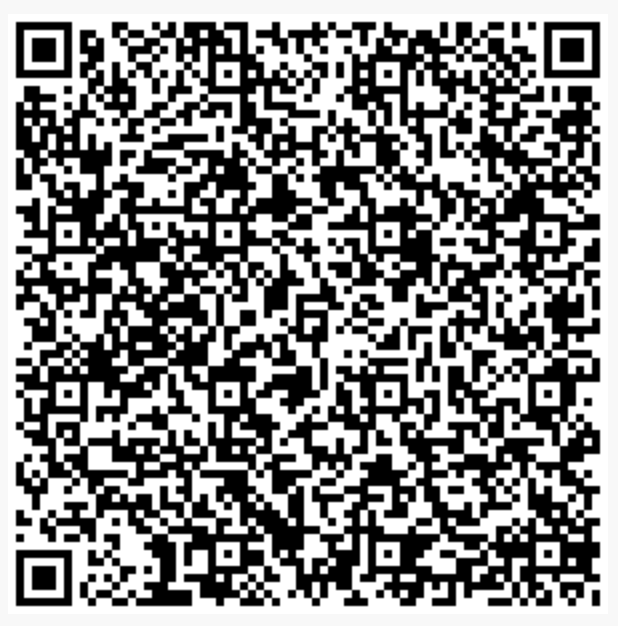    
</div> 
Python 2.x/3.x

Required Python Packages: [eikon](https://pypi.org/project/eikon/), [pandas](https://pypi.org/project/pandas/), [numpy](https://pypi.org/project/numpy/), [matplotlib==](https://pypi.org/project/matplotlib/), [TA-Lib](https://pypi.org/project/TA-Lib/), [pandas_ta](https://pypi.org/project/pandas-ta/), [mplfinance](https://pypi.org/project/mplfinance/), [backtrader](https://pypi.org/project/mplfinance/)

### Import all the packages we need

In [1]:
import refinitiv.data.eikon as ek
import talib
import pandas_ta as pta
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplfinance as mpf
import datetime as dt
import numpy as np
from sklearn.svm import SVC
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.simplefilter("ignore")
import configparser
cfg = configparser.ConfigParser()
cfg.read('rdp.cfg',encoding='utf-8')
%matplotlib inline
plt.style.use("dark_background")
mpl.style.use("dark_background")
ek.set_app_key(cfg['eikon']['app_key'])
#ek.set_app_key('YOUR APP KEY HERE')

### Get our data - one Line API call

### Use our get_timeseries function to return us hourly OHLCV for cable (GBP=)

In [2]:
df1= ek.get_timeseries('GBP=',fields=['OPEN','HIGH','LOW','CLOSE','COUNT'],start_date='04-20-2022',
                       end_date='06-30-2022',interval='hour') #,corax='adjusted'

df1.columns=['open','high','low','close','volume']
df1

,open,high,low,close,volume
Date,,,,,
2022-04-20 00:00:00,1.3007,1.3014,1.3001,1.3012,3431
2022-04-20 01:00:00,1.3012,1.302,1.3008,1.3015,4609
2022-04-20 02:00:00,1.3017,1.303,1.3008,1.3027,6519
2022-04-20 03:00:00,1.3027,1.3036,1.302,1.3028,5530
2022-04-20 04:00:00,1.3028,1.3045,1.3026,1.3038,4734
...,...,...,...,...,...
2022-06-29 20:00:00,1.2118,1.2124,1.2111,1.2115,3931
2022-06-29 21:00:00,1.2117,1.2125,1.2111,1.2125,1954
2022-06-29 22:00:00,1.2125,1.2126,1.2116,1.2121,461


In [3]:
df1.dropna(how="any", inplace=True)
len(df1)

1263

### Pandas TA package is very useful tool to create various technical analysis features with ease

### Types of Indicator

Cycles(1), Momentum(41), Overlap(33), Performance(3), Statistics(11), Trend(18), Utility(5), Volatility(14), Volume(15) as well as Candlestick Patterns (64) are provided by the package ready for you to implement - and as we will see implementation is a breeze. The breadth of indicators means that you can experiment to your hearts content with combinations of indicators etc. We can look at what these are as below:

In [4]:
df1.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

### Lets see how easy it is to create some Bollinger Bands

In [5]:
df2 = df1.copy()
df2.ta.bbands(length=50, std=2, mamode="sma", ddof=0, append=True)
df2

,open,high,low,close,volume,BBL_50_2.0,BBM_50_2.0,BBU_50_2.0,BBB_50_2.0,BBP_50_2.0
Date,,,,,,,,,,
2022-04-20 00:00:00,1.3007,1.3014,1.3001,1.3012,3431,NaN,NaN,NaN,NaN,NaN
2022-04-20 01:00:00,1.3012,1.302,1.3008,1.3015,4609,NaN,NaN,NaN,NaN,NaN
2022-04-20 02:00:00,1.3017,1.303,1.3008,1.3027,6519,NaN,NaN,NaN,NaN,NaN
2022-04-20 03:00:00,1.3027,1.3036,1.302,1.3028,5530,NaN,NaN,NaN,NaN,NaN
2022-04-20 04:00:00,1.3028,1.3045,1.3026,1.3038,4734,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-06-29 20:00:00,1.2118,1.2124,1.2111,1.2115,3931,1.210360,1.220602,1.230844,1.678200,0.055656
2022-06-29 21:00:00,1.2117,1.2125,1.2111,1.2125,1954,1.210004,1.220304,1.230604,1.688177,0.121181
2022-06-29 22:00:00,1.2125,1.2126,1.2116,1.2121,461,1.209617,1.220018,1.230419,1.705078,0.119368


### We can now easily plot these

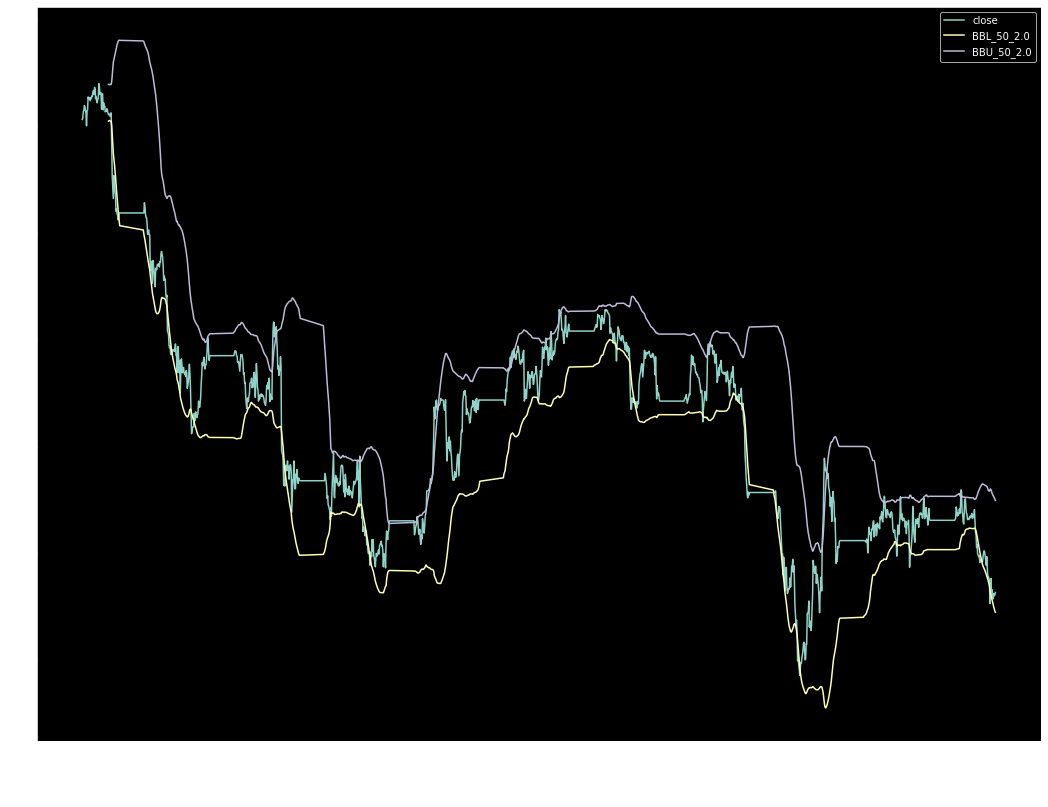

In [6]:
df2[['close','BBL_50_2.0','BBU_50_2.0']].plot(figsize=(18,15))

### Candlestick pattern recognition 

### 64 candlestick patterns - some with bidirectional bullish and bearish configurations

### Bullish structures indicated with +100, Bearish structures with -100

In [7]:
df3 = df1.copy()
df3.ta.cdl_pattern(name="all",append=True)
df3

,open,high,low,close,volume,CDL_2CROWS,CDL_3BLACKCROWS,CDL_3INSIDE,CDL_3LINESTRIKE,CDL_3OUTSIDE,...,CDL_SPINNINGTOP,CDL_STALLEDPATTERN,CDL_STICKSANDWICH,CDL_TAKURI,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-20 00:00:00,1.3007,1.3014,1.3001,1.3012,3431,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-20 01:00:00,1.3012,1.302,1.3008,1.3015,4609,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-20 02:00:00,1.3017,1.303,1.3008,1.3027,6519,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-20 03:00:00,1.3027,1.3036,1.302,1.3028,5530,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-20 04:00:00,1.3028,1.3045,1.3026,1.3038,4734,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29 20:00:00,1.2118,1.2124,1.2111,1.2115,3931,0.0,0.0,0.0,0.0,0.0,...,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-29 21:00:00,1.2117,1.2125,1.2111,1.2125,1954,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-29 22:00:00,1.2125,1.2126,1.2116,1.2121,461,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Difficult to see when these signals are being generated from large dataframes - so you can check the min and max readings to see if any bullish or bearish signals are present.

In [8]:
df3.describe()

,open,high,low,close,volume,CDL_2CROWS,CDL_3BLACKCROWS,CDL_3INSIDE,CDL_3LINESTRIKE,CDL_3OUTSIDE,...,CDL_SPINNINGTOP,CDL_STALLEDPATTERN,CDL_STICKSANDWICH,CDL_TAKURI,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS
count,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.0,1263.0,1263.000000,1263.000000,1263.000000,...,1263.000000,1263.000000,1263.000000,1263.000000,1263.0,1263.0,1263.000000,1263.0,1263.0,1263.00000
mean,1.244796,1.246064,1.243449,1.244710,4851.055424,0.0,0.0,0.079177,0.237530,-0.712589,...,2.454473,-0.158353,0.079177,1.662708,0.0,0.0,-0.079177,0.0,0.0,-0.23753
std,0.021587,0.021410,0.021675,0.021541,2105.007104,0.0,0.0,8.444471,4.869838,18.445076,...,49.099588,3.977784,2.813833,12.792019,0.0,0.0,2.813833,0.0,0.0,7.44386
min,1.197000,1.198900,1.193200,1.197200,1.000000,0.0,0.0,-100.000000,0.000000,-100.000000,...,-100.000000,-100.000000,0.000000,0.000000,0.0,0.0,-100.000000,0.0,0.0,-100.00000
25%,1.227100,1.228300,1.226100,1.227000,3619.500000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000
50%,1.248100,1.249000,1.246800,1.248200,5095.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000
75%,1.256900,1.257900,1.255600,1.256850,6191.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000
max,1.307900,1.309000,1.306100,1.307900,11741.000000,0.0,0.0,100.000000,100.000000,100.000000,...,100.000000,0.000000,100.000000,100.000000,0.0,0.0,0.000000,0.0,0.0,100.00000


### Lets use Matplotlib Finance package to create some candlestick charts with ease

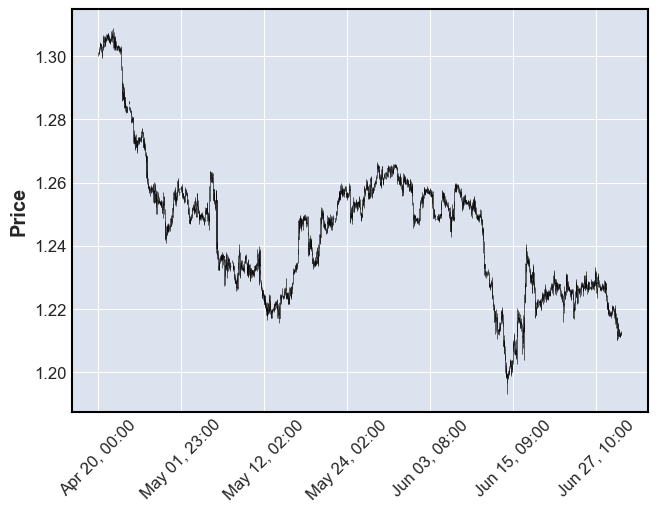

In [9]:
df3 = df3.astype(float)
mpf.plot(df3, type='candle')

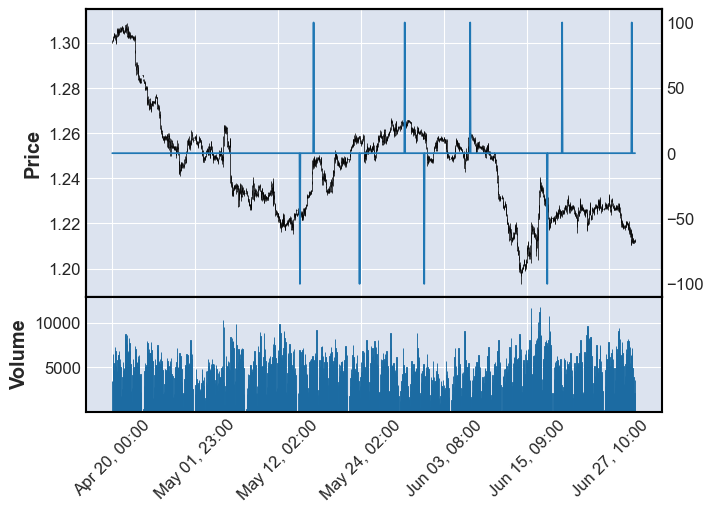

In [10]:
apdict = mpf.make_addplot(df3['CDL_3INSIDE'])
mpf.plot(df3,volume=True,addplot=apdict)

### Use these indicators to create a strategy and backtest using BackTrader package

In [11]:
df4 = df1.copy()

### Implement 3 trading strategies, Create one bespoke indicator

### MA XOver, MA XOver with shorting, Donchian Channel

In [12]:
class smaCross(bt.Strategy):
  # list of parameters which are configurable for the strategy
    params = dict(
        pfast=50,  # period for the fast moving average
        pslow=100   # period for the slow moving average
    )
    
    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal
  
    def next(self):
        if not self.position and self.crossover > 0:  # not in the market
            self.buy(size=100)
        elif self.position and self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position

### smaCross2 Strategy

Here all we are doing is to modify the previous strategy by allowing shorting.

In [13]:
class smaCross2(bt.Strategy):
  # list of parameters which are configurable for the strategy
    params = dict(
        pfast=50,  # period for the fast moving average
        pslow=100   # period for the slow moving average
    )
    
    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal
                   
    def next(self):    
        if self.position.size == 0 and self.crossover > 0:  # not in the market
            self.buy(size=100)
        elif self.position.size == 0 and self.crossover < 0:
            self.sell(size=100)
        elif self.position.size > 0 and self.crossover < 0: # long in the market & cross to the downside
            self.close() # close long position
            self.sell(size=100)
        elif self.position.size < 0 and self.crossover > 0:  # short in the market & cross to the upside
            self.close() # close short position
            self.buy(size=100)                  

### Create new Indicator

In [14]:
class DonchianChannels(bt.Indicator):
    '''
    Params Note:
      - ``lookback`` (default: -1)

        If `-1`, the bars to consider will start 1 bar in the past and the
        current high/low may break through the channel.

        If `0`, the current prices will be considered for the Donchian
        Channel. This means that the price will **NEVER** break through the
        upper/lower channel bands.
    '''

    alias = ('DCH', 'DonchianChannel',)

    lines = ('dcm', 'dch', 'dcl',)  # dc middle, dc high, dc low
    params = dict(
        period=20,
        lookback=-1,  # consider current bar or not
    )

    plotinfo = dict(subplot=False)  # plot along with data
    plotlines = dict(
        dcm=dict(ls='--'),  # dashed line
        dch=dict(_samecolor=True),  # use same color as prev line (dcm)
        dcl=dict(_samecolor=True),  # use same color as prev line (dch)
    )

    def __init__(self):
        hi, lo = self.data.high, self.data.low
        if self.p.lookback:  # move backwards as needed
            hi, lo = hi(self.p.lookback), lo(self.p.lookback)

        self.l.dch = bt.ind.Highest(hi, period=self.p.period)
        self.l.dcl = bt.ind.Lowest(lo, period=self.p.period)
        self.l.dcm = (self.l.dch + self.l.dcl) / 2.0  # avg of the above

### Create new strategy for that

In [15]:
class DonchianCh(bt.Strategy):
    
    def __init__(self):
        self.donchian = DonchianChannels()
  
    def next(self):
        if self.data[0] > self.donchian.dch[0]:
            self.sell()
        elif self.data[0] < self.donchian.dcl[0]:
            self.buy()

### Now we have defined our 3 strategies we can pass them to our broker object

### For easy multiple strategy tests I have created a generalised brokerObject function

In [16]:
# create a function for this which takes a strategy_name, df, date_from, date_to & time_frame & compression as an input
def brokerObject(strategy_name,data_frame,from_date,to_date,time_frame,compression):
    
    # initialize backtrader broker
    cerebro = bt.Cerebro(stdstats=True)
    cerebro.broker.setcash(1000)
    cerebro.broker.setcommission(commission=0.001)

    # add strategy 
    cerebro.addstrategy(strategy_name)
    # wire up bt.feeds.PandasData to data_frame, set timeperiod, timeframe and also compression
    data = bt.feeds.PandasData(dataname=data_frame,fromdate=from_date,todate=to_date,
                               timeframe=time_frame,compression=compression) 
    cerebro.adddata(data)

    # add analyzers
    
    # run backtest
    res = cerebro.run()
    strat = res[0]

    #prepare plots
    mpl.rcParams['font.sans-serif']=['DejaVu Sans']
    mpl.rcParams['axes.unicode_minus']=False
    mpl.rcParams['figure.figsize']=[18, 16]
    mpl.rcParams['figure.dpi']=200
    mpl.rcParams['figure.facecolor']='w'
    mpl.rcParams['figure.edgecolor']='k'
    
    return cerebro.plot(style='candle',iplot=False,width=30,height=30,start=from_date, end=to_date)

[[<Figure size 1680x3200 with 5 Axes>]]

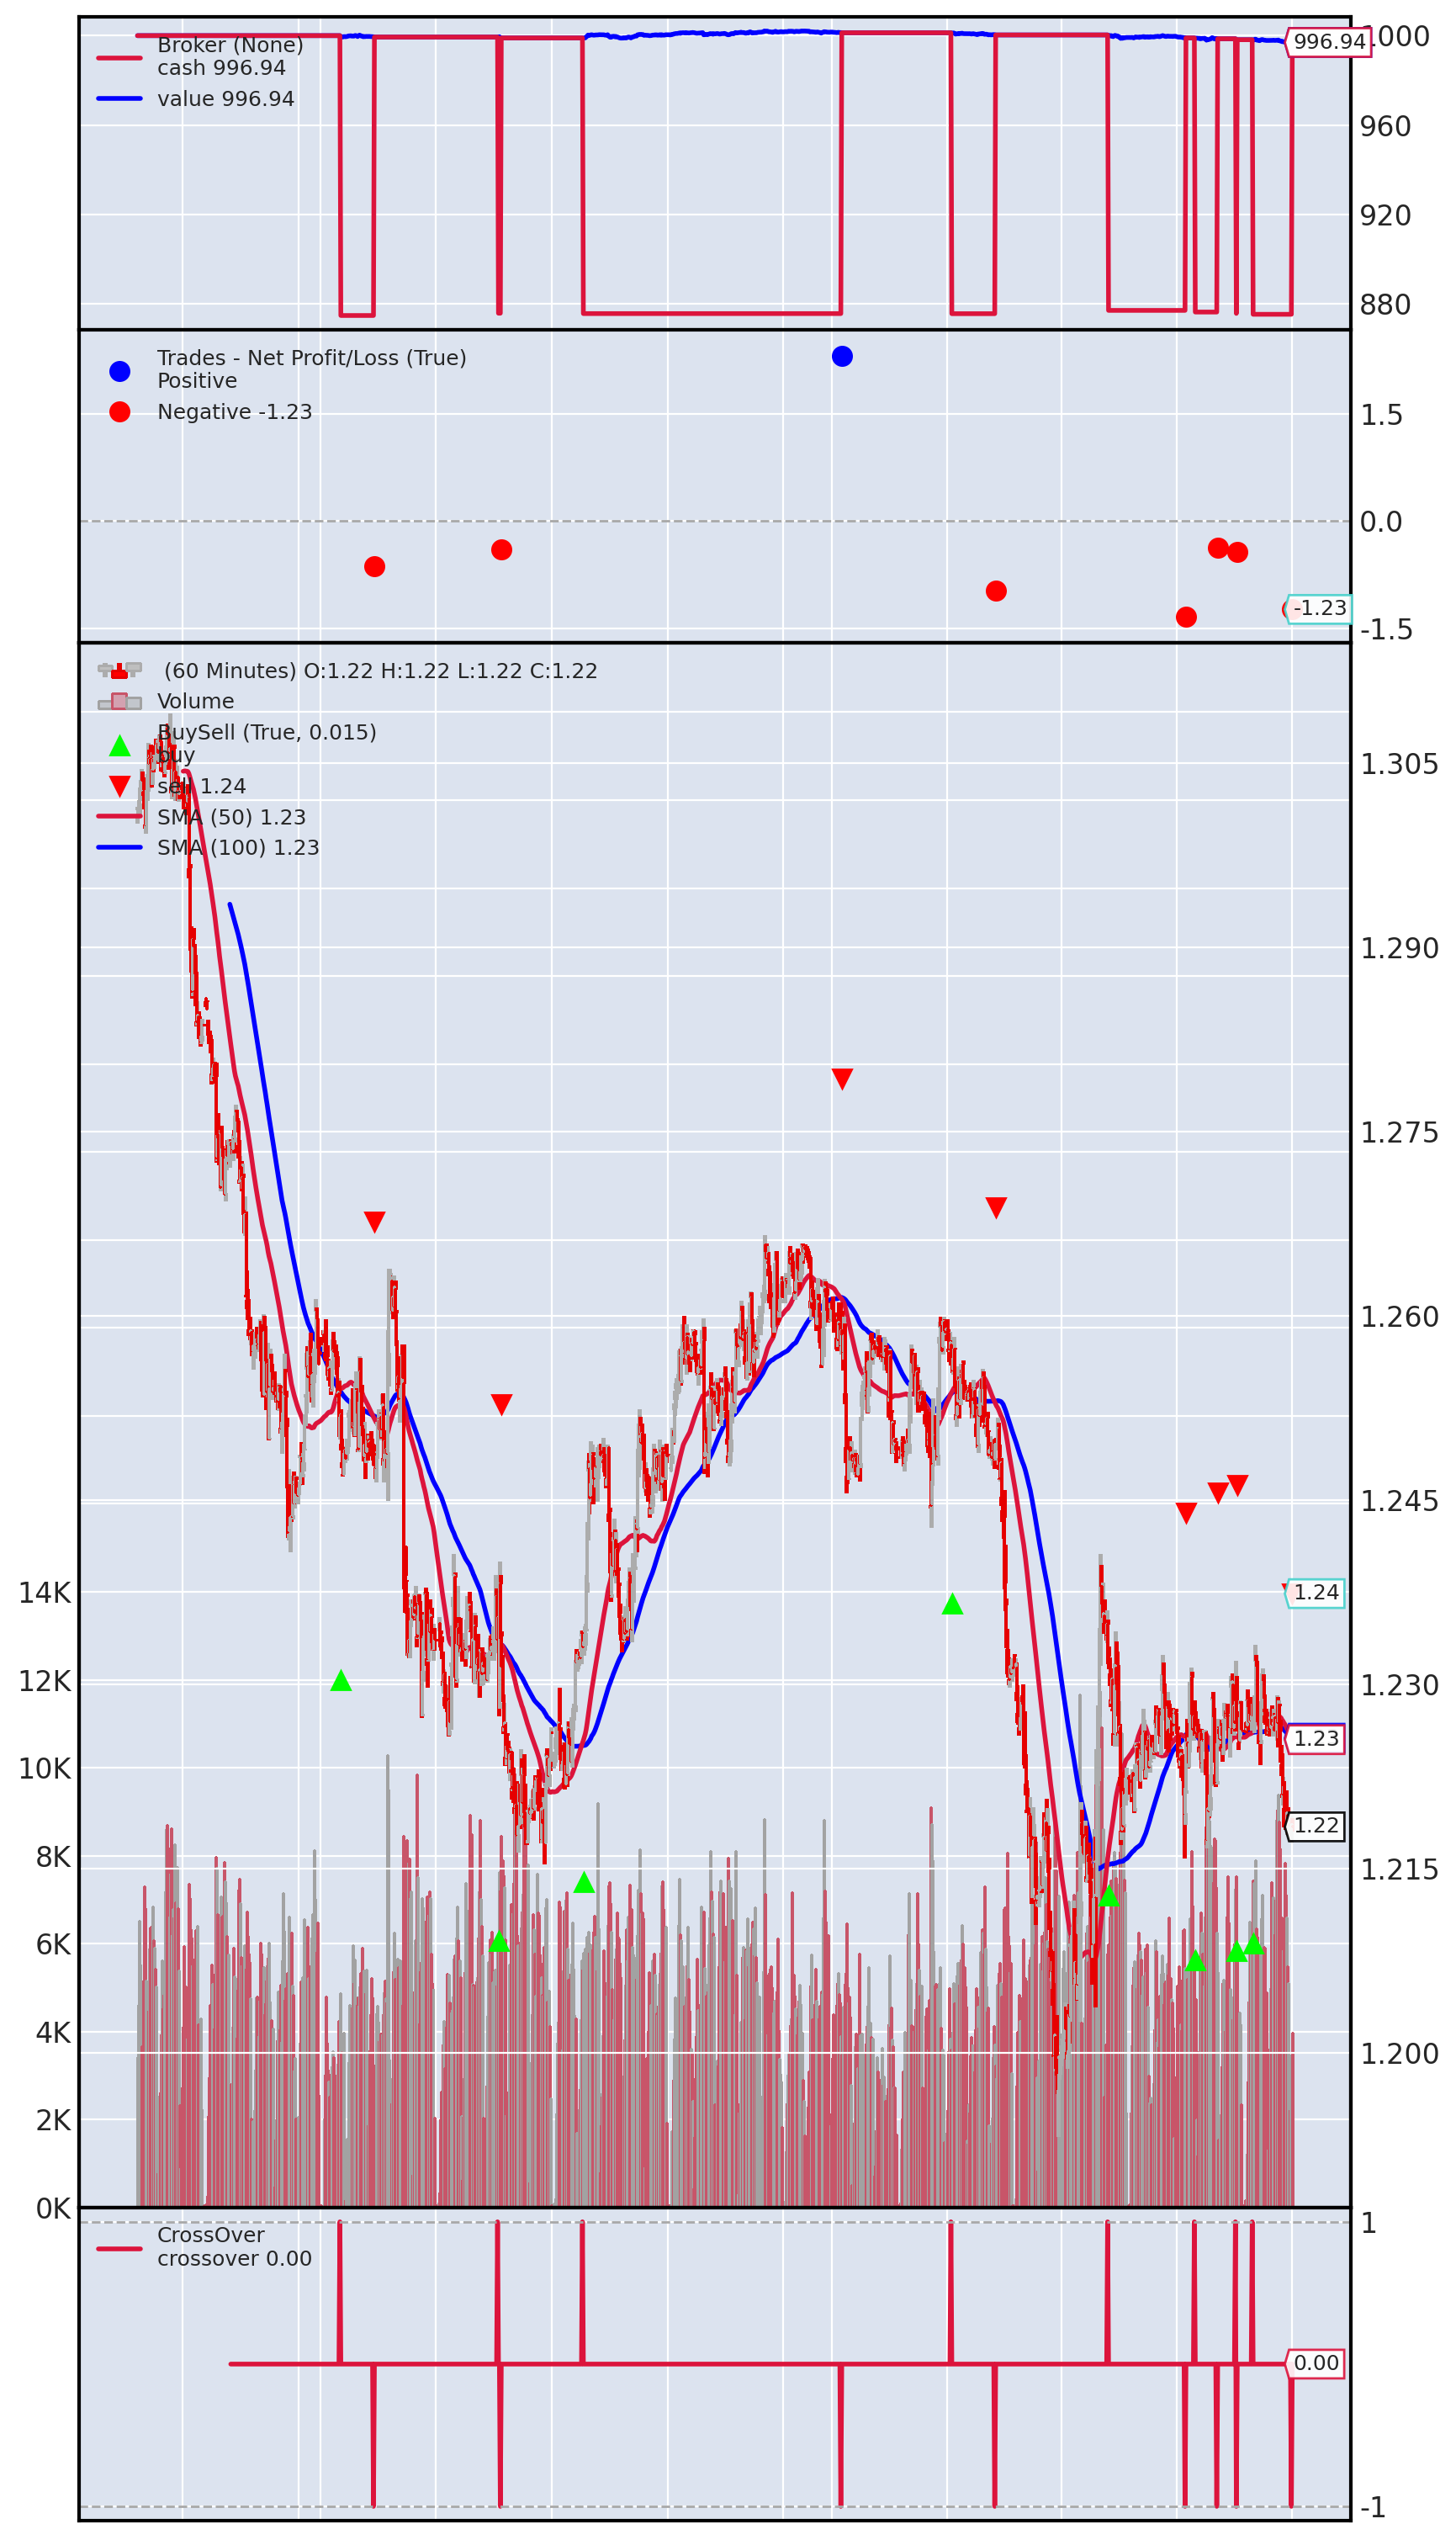

In [17]:
brokerObject(smaCross,df4,dt.datetime(2022, 4, 20),dt.datetime(2022, 6, 29),bt.TimeFrame.Minutes,60)

Now we have our brokerObject function we can simply run another test just replacing the strategy with the new one...simples.

[[<Figure size 1680x3200 with 5 Axes>]]

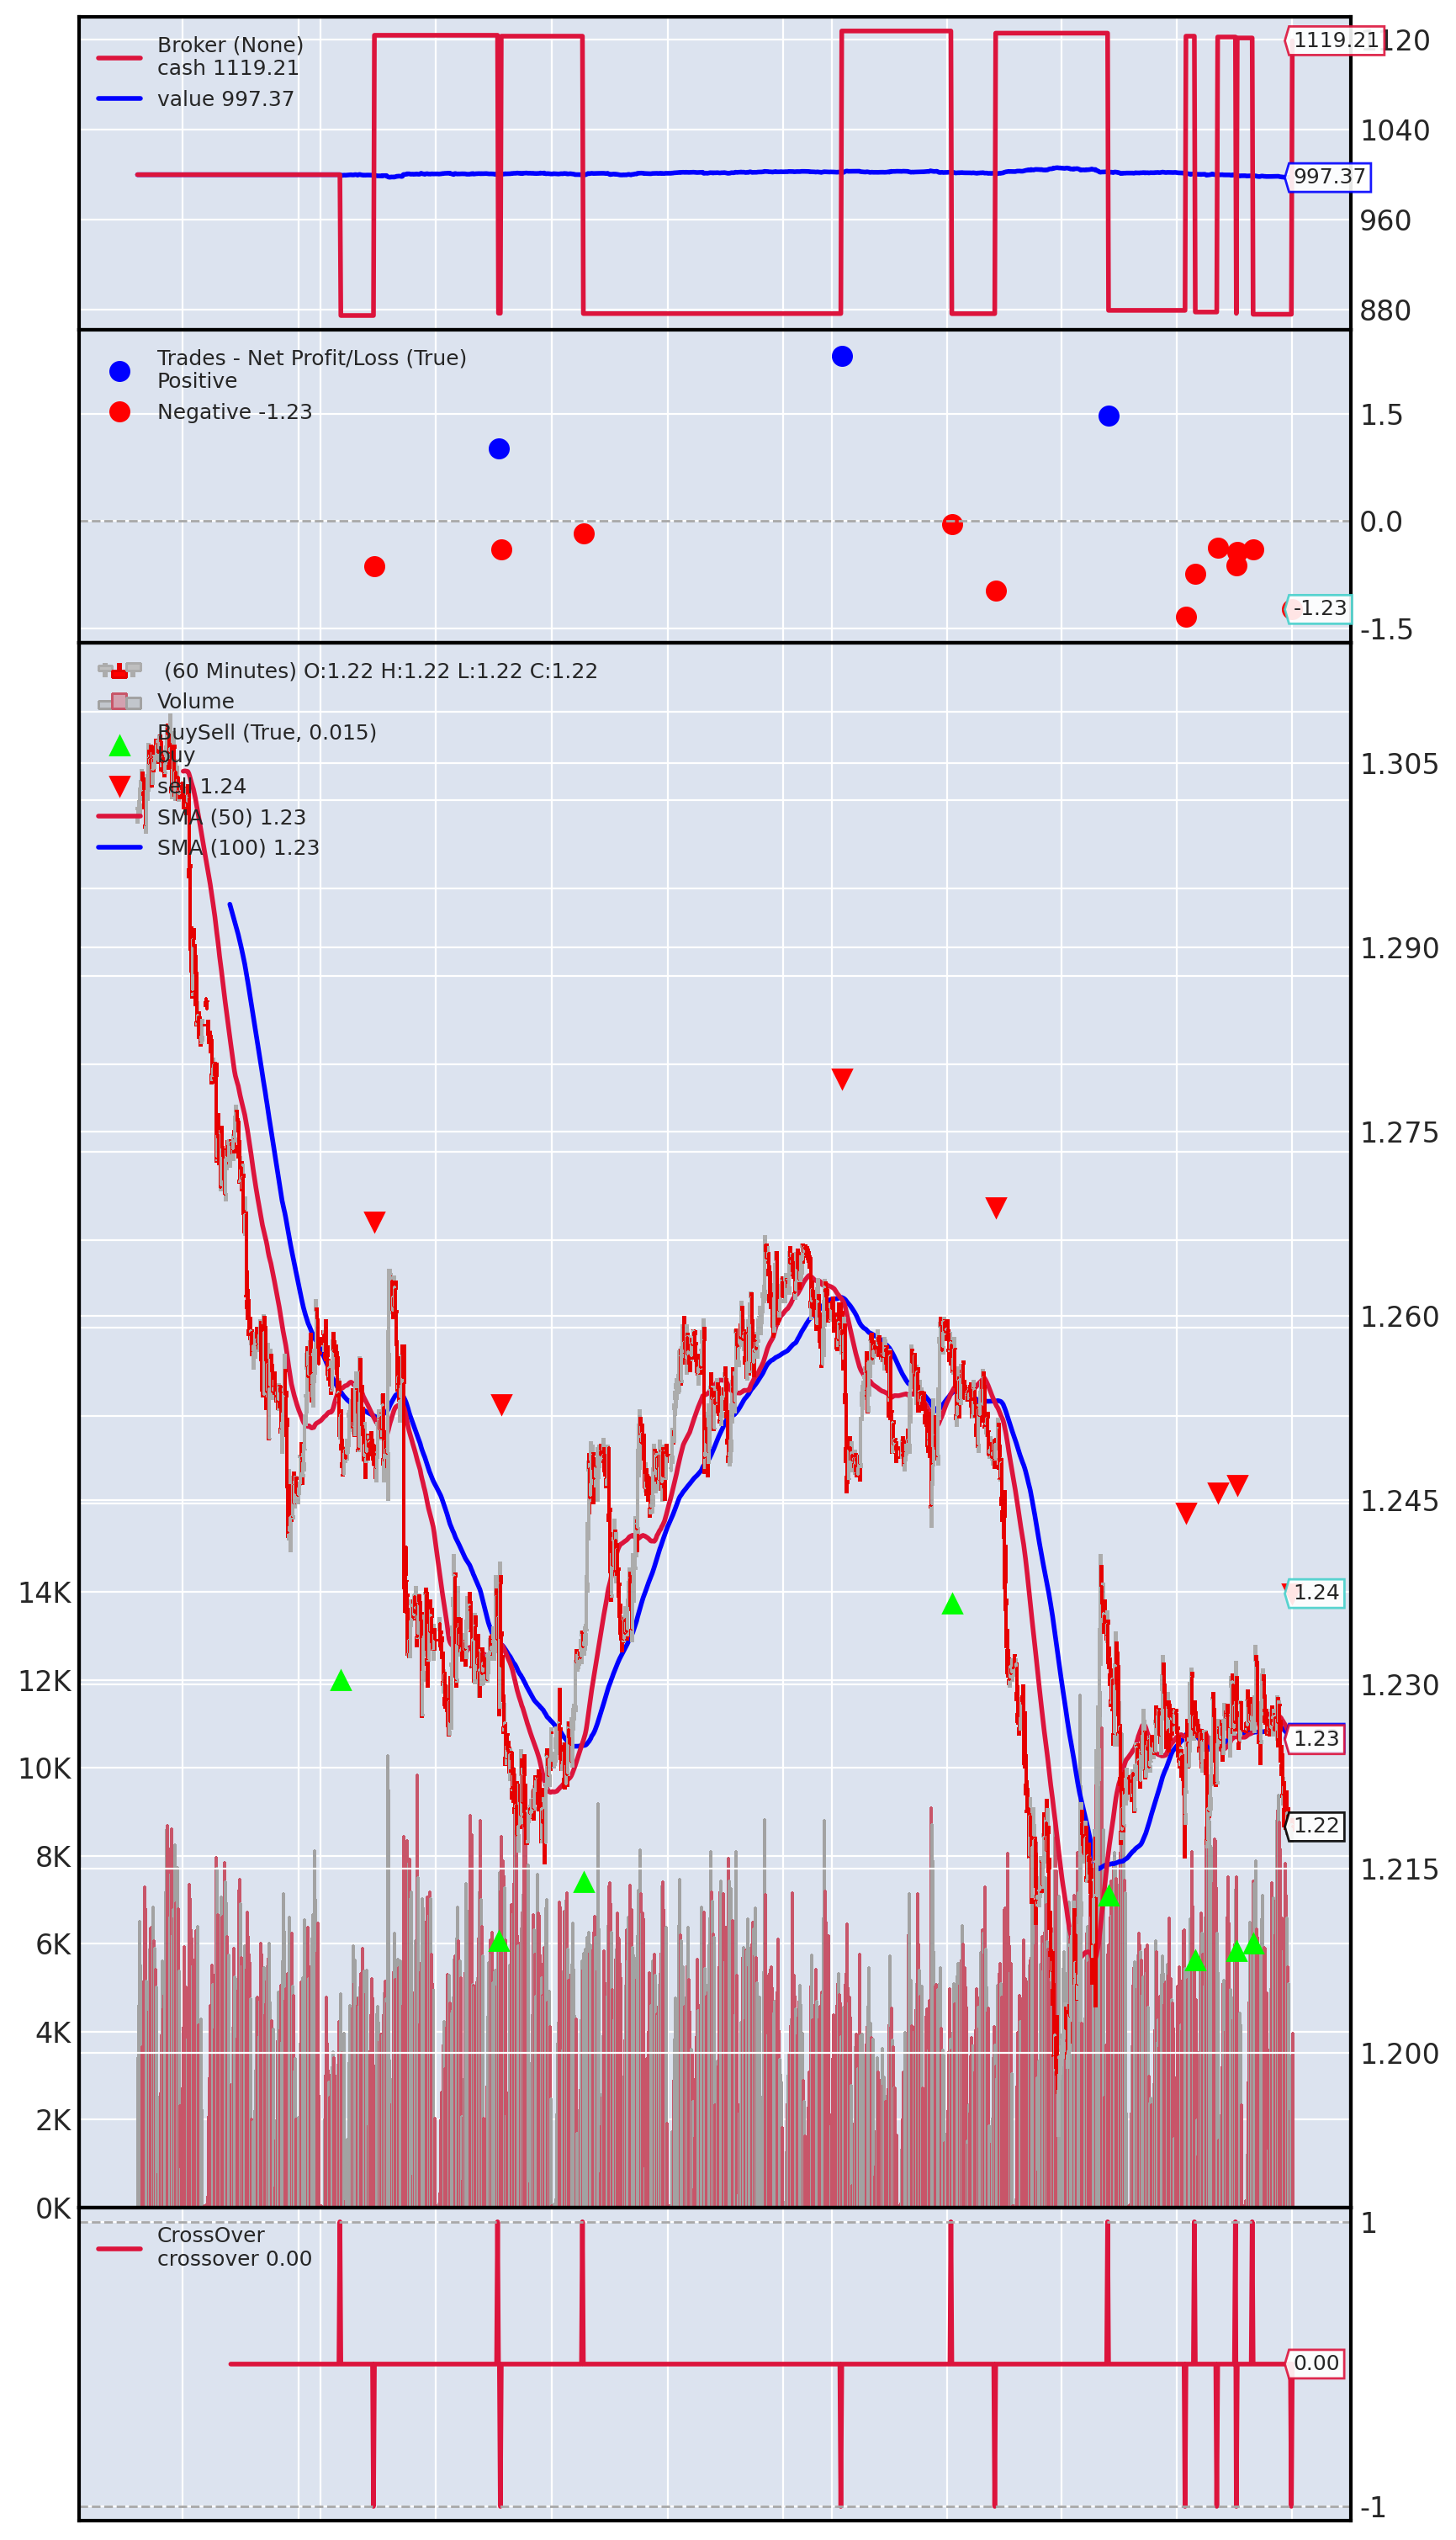

In [18]:
brokerObject(smaCross2,df4,dt.datetime(2022, 4, 20),dt.datetime(2022, 6, 29),bt.TimeFrame.Minutes,60)

[[<Figure size 1680x3200 with 4 Axes>]]

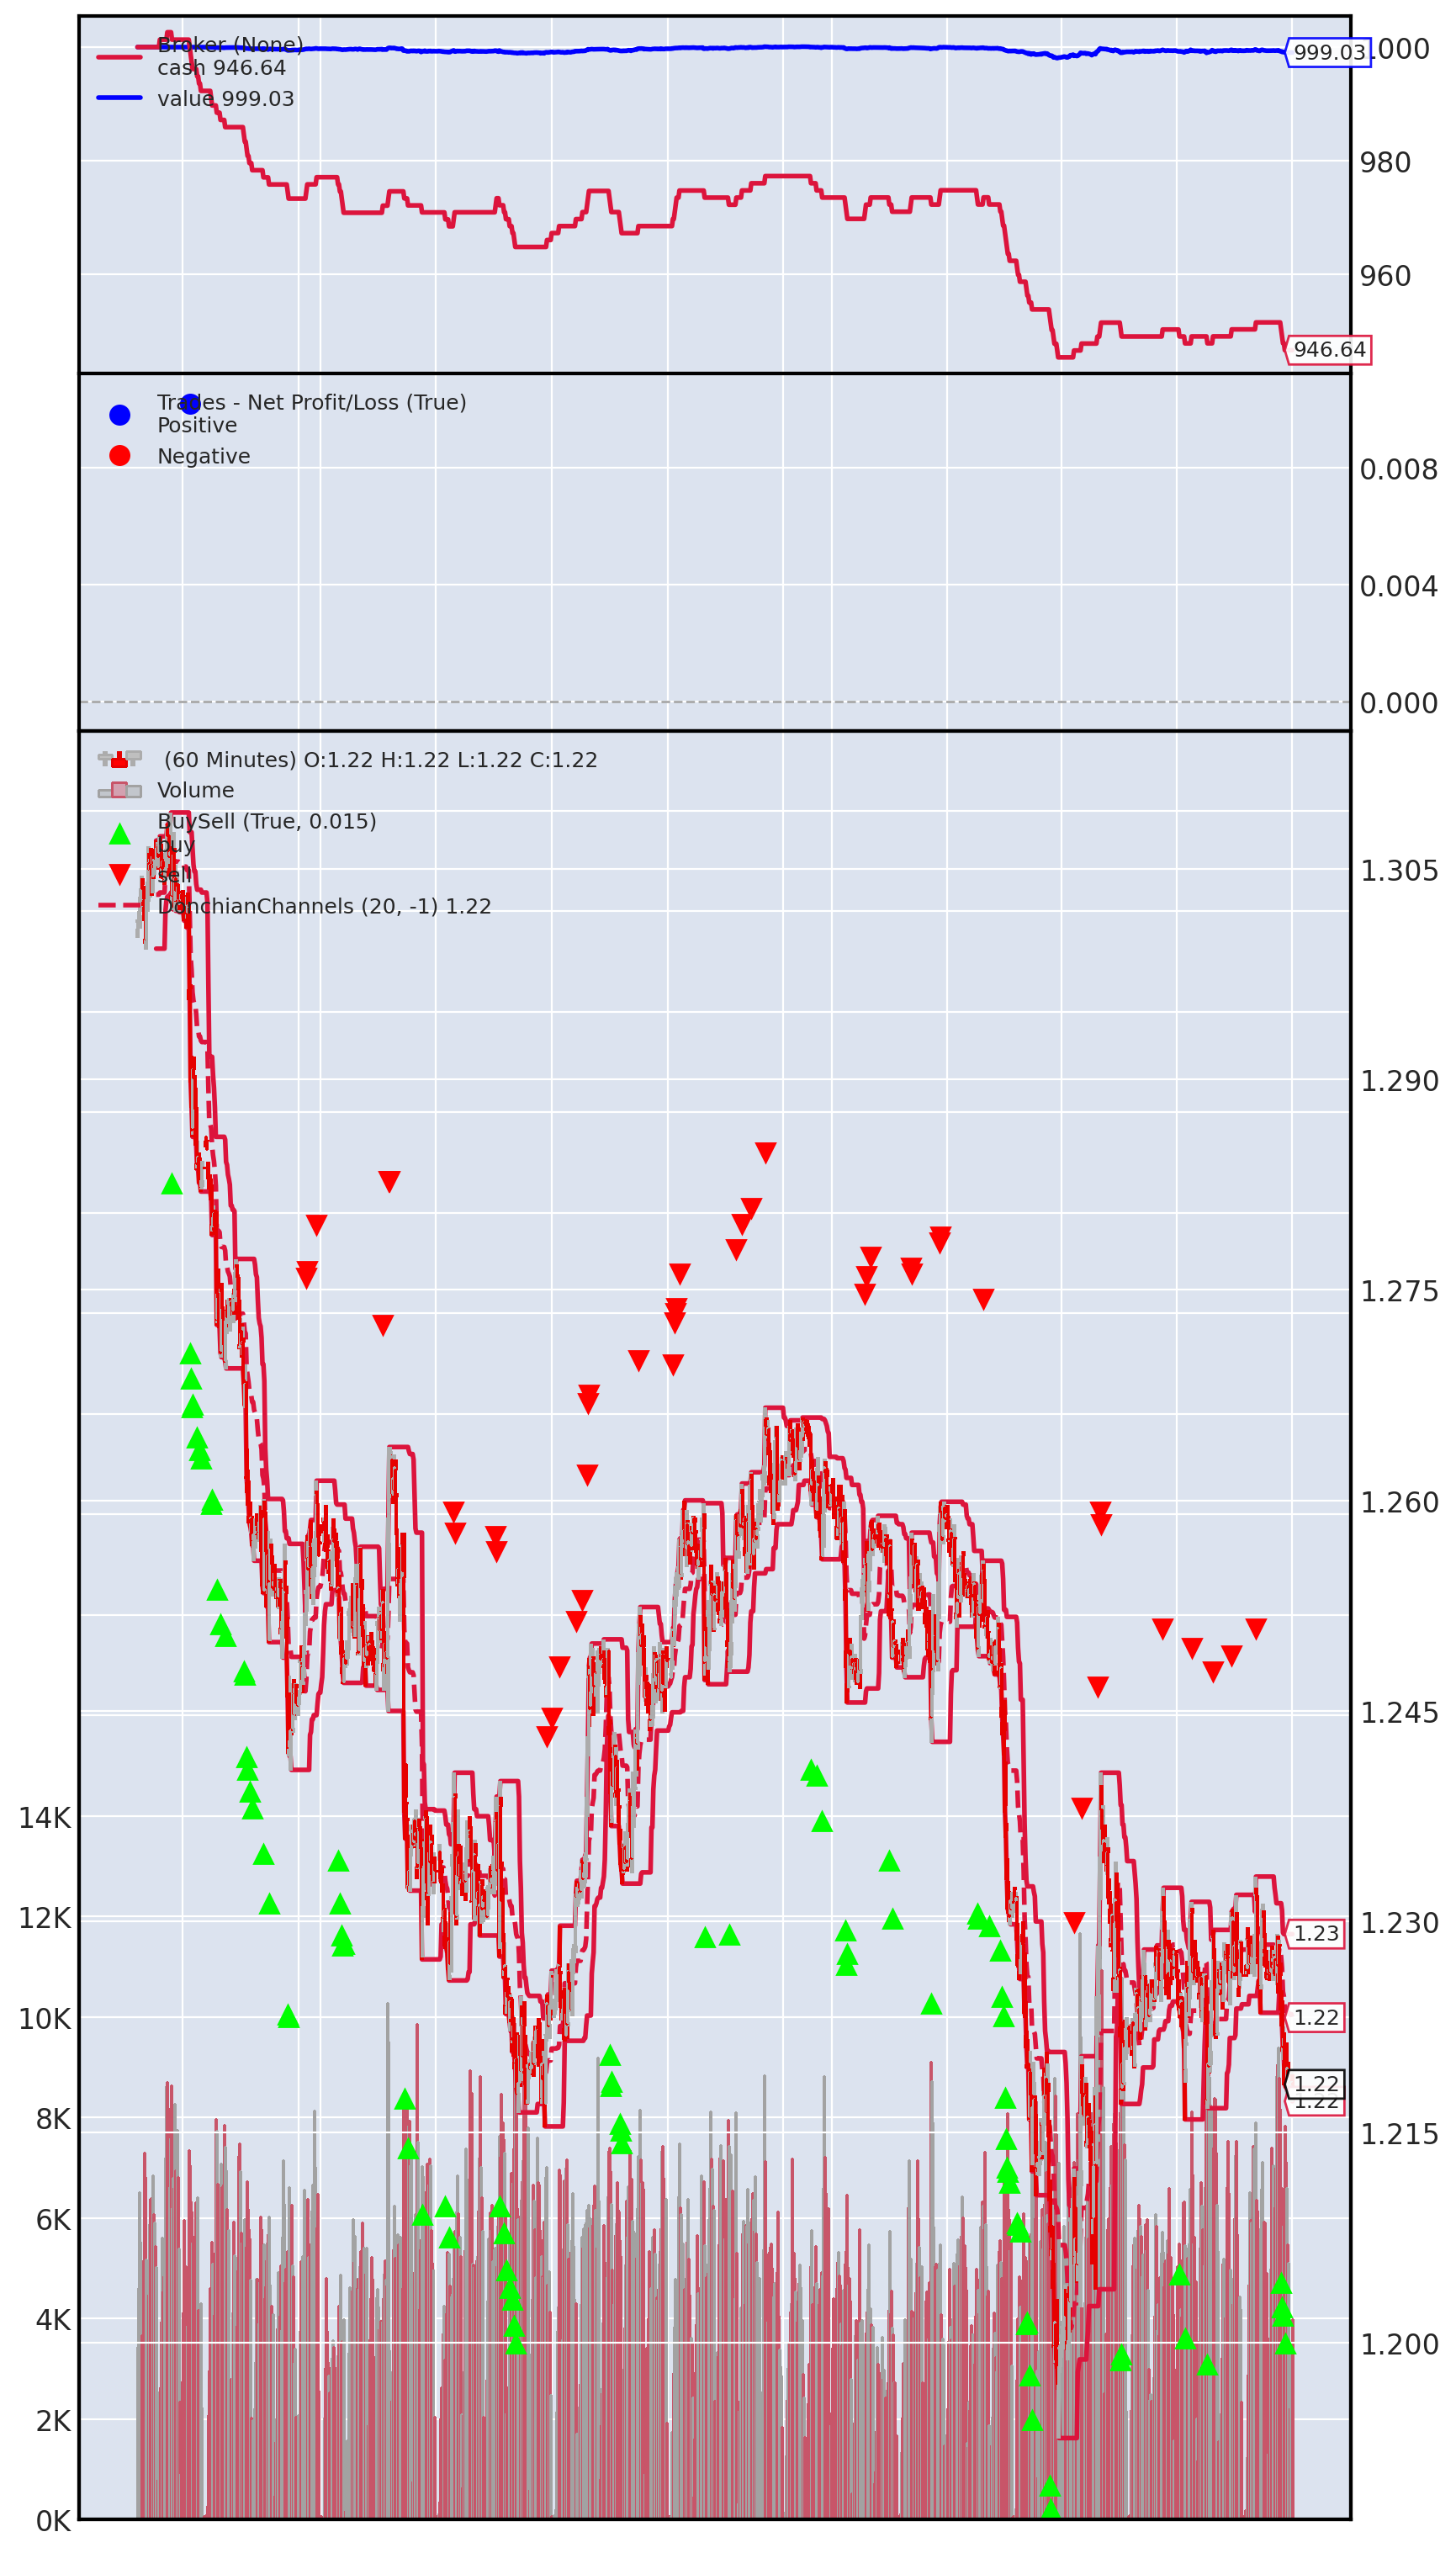

In [19]:
brokerObject(DonchianCh,df4,dt.datetime(2022, 4, 20),dt.datetime(2022, 6, 29),bt.TimeFrame.Minutes,60)

## Simple Pattern Recognition using Machine Learning Algorithm (by Dr. Yves Hilpisch of tpq.io)

### - Generate AI strategy using pattern recognition of lagged returns data
### - Simple example - note lagged returns are correlated - usually features should not be correlated
### - First lets create a new dataframe for 3 RICs

In [20]:
rics = ['QQQ.O','AMZN.O','AAPL.O'] 
ts = pd.DataFrame()
for ric in rics:
    ts[ric] = ek.get_timeseries(ric,fields='CLOSE', start_date='05-05-2022',end_date='09-05-2022', 
                                interval='hour',corax='adjusted')['CLOSE']

ts

,QQQ.O,AMZN.O,AAPL.O
Date,,,
2022-05-05 00:00:00,329.25,125.5835,165.77
2022-05-05 09:00:00,326.55,124.3375,164.55
2022-05-05 10:00:00,327.02,124.75,164.61
2022-05-05 11:00:00,326.84,124.5995,164.73
2022-05-05 12:00:00,327.08,124.25,164.84
...,...,...,...
2022-09-02 20:00:00,295.2,127.66,155.85
2022-09-02 21:00:00,295.69,127.82,156.14
2022-09-02 22:00:00,295.52,127.715,155.85


### Create a returns series - should be stationary - check using Augmented Dickey-Fuller test

In [21]:
rets = np.log(ts / ts.shift(1)).dropna()
rets.head()

,QQQ.O,AMZN.O,AAPL.O
Date,,,
2022-05-05 09:00:00,-0.008234,-0.009971,-0.007387
2022-05-05 10:00:00,0.001438,0.003312,0.000365
2022-05-05 11:00:00,-0.000551,-0.001207,0.000729
2022-05-05 12:00:00,0.000734,-0.002809,0.000668
2022-05-05 13:00:00,-0.001622,-0.000402,-0.001639


In [22]:
adfuller(ts['QQQ.O'])

(-1.8958843028721786,
 0.3339997348292155,
 17,
 1327,
 {'1%': -3.435287448902869,
  '5%': -2.8637204923840334,
  '10%': -2.5679309018875833},
 4826.467554395947)

In [23]:
adfuller(rets['QQQ.O']) 

(-15.405215004095286,
 3.176308967360804e-28,
 4,
 1339,
 {'1%': -3.435243114656267,
  '5%': -2.8637009293454163,
  '10%': -2.567920483819421},
 -10204.866559604561)

### Create lagged data function

In [24]:
def add_lags(data, ric, lags):
    cols = []
    df = pd.DataFrame(data[ric])
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)  # defines the column name
        # creates the lagged data column with directional values
        df[col] = df[ric].shift(lag)
        cols.append(col)  # stores the column name
    df.dropna(inplace=True)  # gets rid of incomplete data rows
    return df, cols

### For each of our Instruments, create lagged data frame with 20 lags 

In [25]:
lags = 20
dfs = {}
for ric in rics:
    df, cols = add_lags(rets, ric, lags)
    dfs[ric] = df

In [26]:
dfs['AAPL.O']

,AAPL.O,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-06 13:00:00,-0.003462,-0.000192,-0.003577,0.002106,-0.008716,0.003808,-0.001525,-0.002093,0.006547,0.002714,...,-0.004731,-0.001268,-0.015413,-0.009011,-0.017964,-0.001639,0.000668,0.000729,0.000365,-0.007387
2022-05-06 14:00:00,-0.006359,-0.003462,-0.000192,-0.003577,0.002106,-0.008716,0.003808,-0.001525,-0.002093,0.006547,...,-0.002627,-0.004731,-0.001268,-0.015413,-0.009011,-0.017964,-0.001639,0.000668,0.000729,0.000365
2022-05-06 15:00:00,0.024372,-0.006359,-0.003462,-0.000192,-0.003577,0.002106,-0.008716,0.003808,-0.001525,-0.002093,...,0.002714,-0.002627,-0.004731,-0.001268,-0.015413,-0.009011,-0.017964,-0.001639,0.000668,0.000729
2022-05-06 16:00:00,-0.006449,0.024372,-0.006359,-0.003462,-0.000192,-0.003577,0.002106,-0.008716,0.003808,-0.001525,...,0.006547,0.002714,-0.002627,-0.004731,-0.001268,-0.015413,-0.009011,-0.017964,-0.001639,0.000668
2022-05-06 17:00:00,0.009786,-0.006449,0.024372,-0.006359,-0.003462,-0.000192,-0.003577,0.002106,-0.008716,0.003808,...,-0.002093,0.006547,0.002714,-0.002627,-0.004731,-0.001268,-0.015413,-0.009011,-0.017964,-0.001639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02 20:00:00,-0.000706,0.001733,-0.013081,-0.01282,0.001975,0.00094,-0.00025,0.007369,0.001582,-0.001266,...,-0.001072,0.002209,-0.001768,0.000883,0.002781,0.007058,0.006292,0.005887,-0.003554,-0.001531
2022-09-02 21:00:00,0.001859,-0.000706,0.001733,-0.013081,-0.01282,0.001975,0.00094,-0.00025,0.007369,0.001582,...,-0.002022,-0.001072,0.002209,-0.001768,0.000883,0.002781,0.007058,0.006292,0.005887,-0.003554
2022-09-02 22:00:00,-0.001859,0.001859,-0.000706,0.001733,-0.013081,-0.01282,0.001975,0.00094,-0.00025,0.007369,...,-0.001266,-0.002022,-0.001072,0.002209,-0.001768,0.000883,0.002781,0.007058,0.006292,0.005887


### Transform lagged returns data into upward moves (+1) or downward moves (-1) 

In [27]:
np.sign(dfs['AAPL.O'])

,AAPL.O,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-06 13:00:00,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
2022-05-06 14:00:00,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
2022-05-06 15:00:00,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2022-05-06 16:00:00,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2022-05-06 17:00:00,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,...,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02 20:00:00,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,...,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
2022-09-02 21:00:00,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,...,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0
2022-09-02 22:00:00,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0


### Even with this 20 lagged sample - over 1 Mill combinations for each row!


In [28]:
2 ** lags #potential number of combinations

1048576

### The ML bit

In [29]:
from sklearn.svm import SVC
for ric in rics:
    model = SVC(C=100) # define the ML model
    df = dfs[ric].copy()  # get data for the RIC
    model.fit(np.sign(df[cols]), np.sign(df[ric].astype(float))) #fit model on features and labels
    dfs[ric]['position'] = model.predict(np.sign(df[cols]))  # label prediction

In [30]:
for ric in rics:
    print('{:10} | {}'.format(ric, dfs[ric]['position'].values[:10]))

QQQ.O      | [-1. -1.  1. -1.  1. -1. -1.  1. -1. -1.]
AMZN.O     | [-1. -1.  1. -1.  1. -1. -1.  1. -1.  1.]
AAPL.O     | [-1. -1.  1. -1.  1. -1. -1.  1. -1. -1.]


In [31]:
for ric in rics:
    dfs[ric]['strategy'] = dfs[ric]['position'] * dfs[ric][ric]

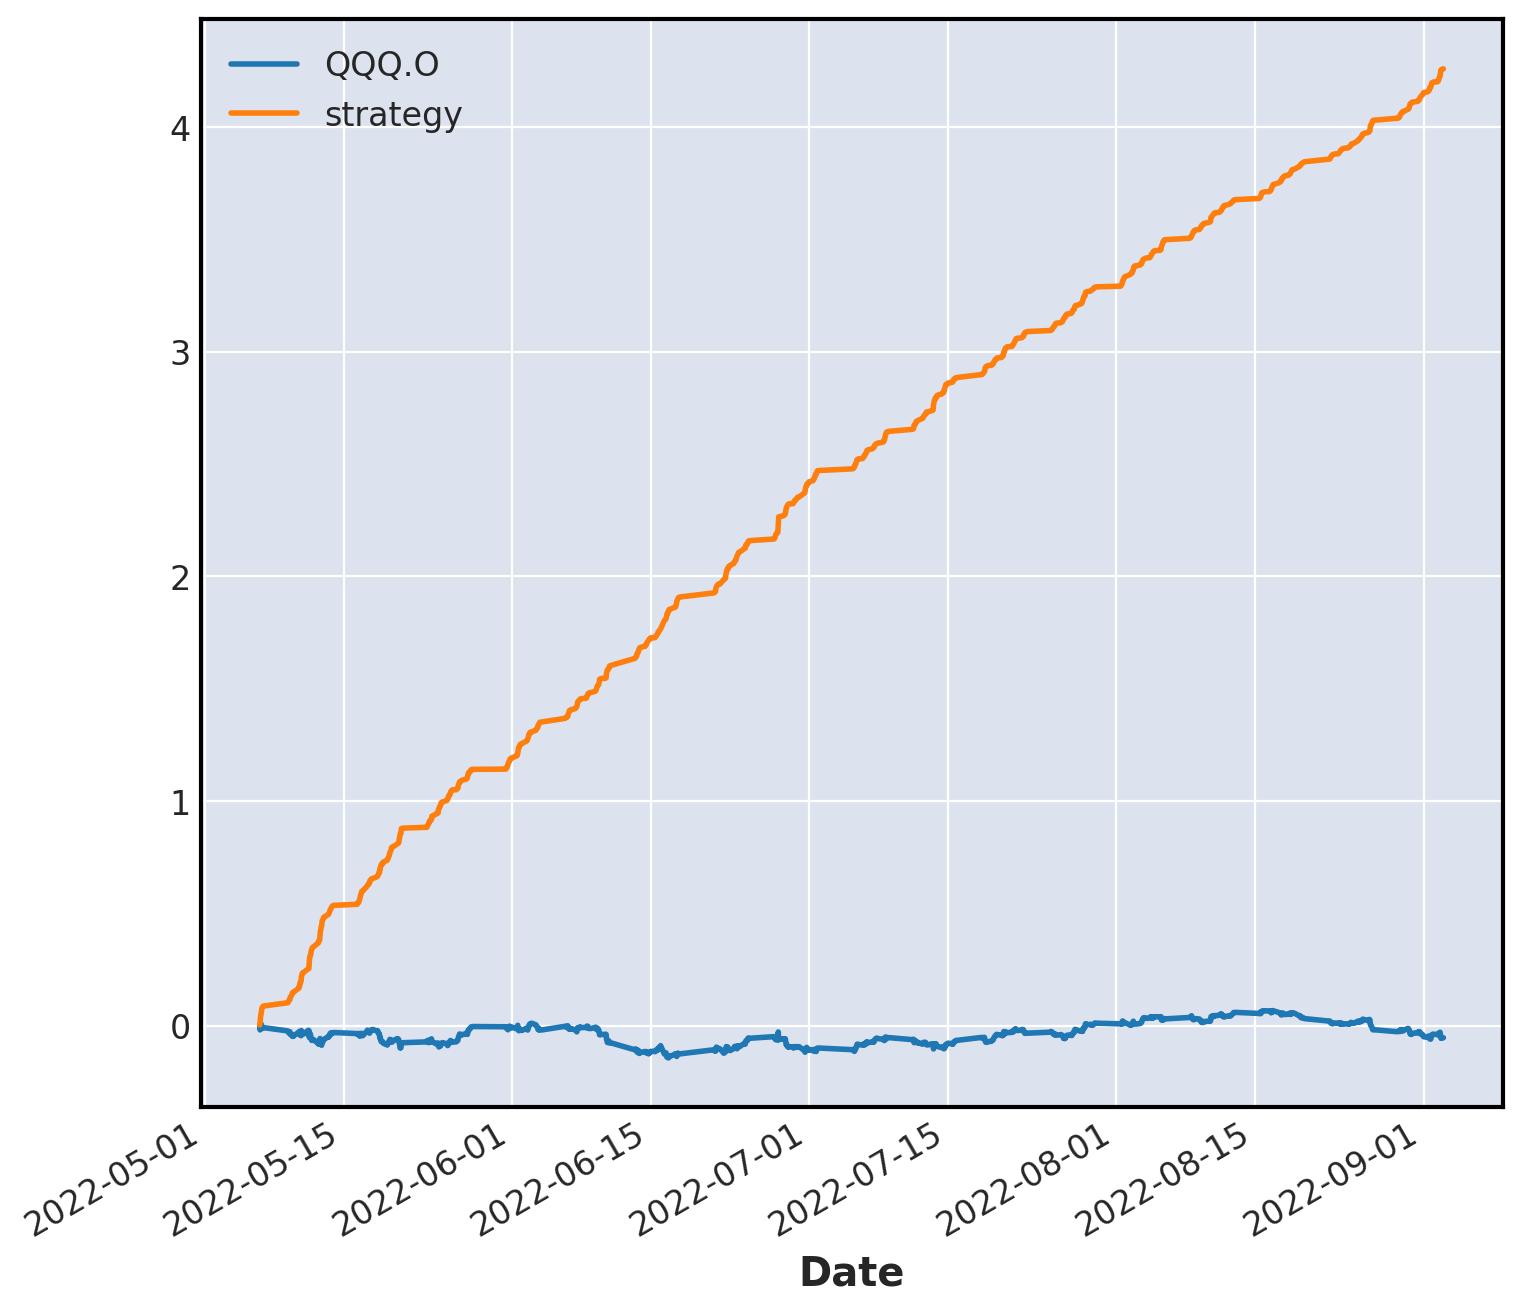

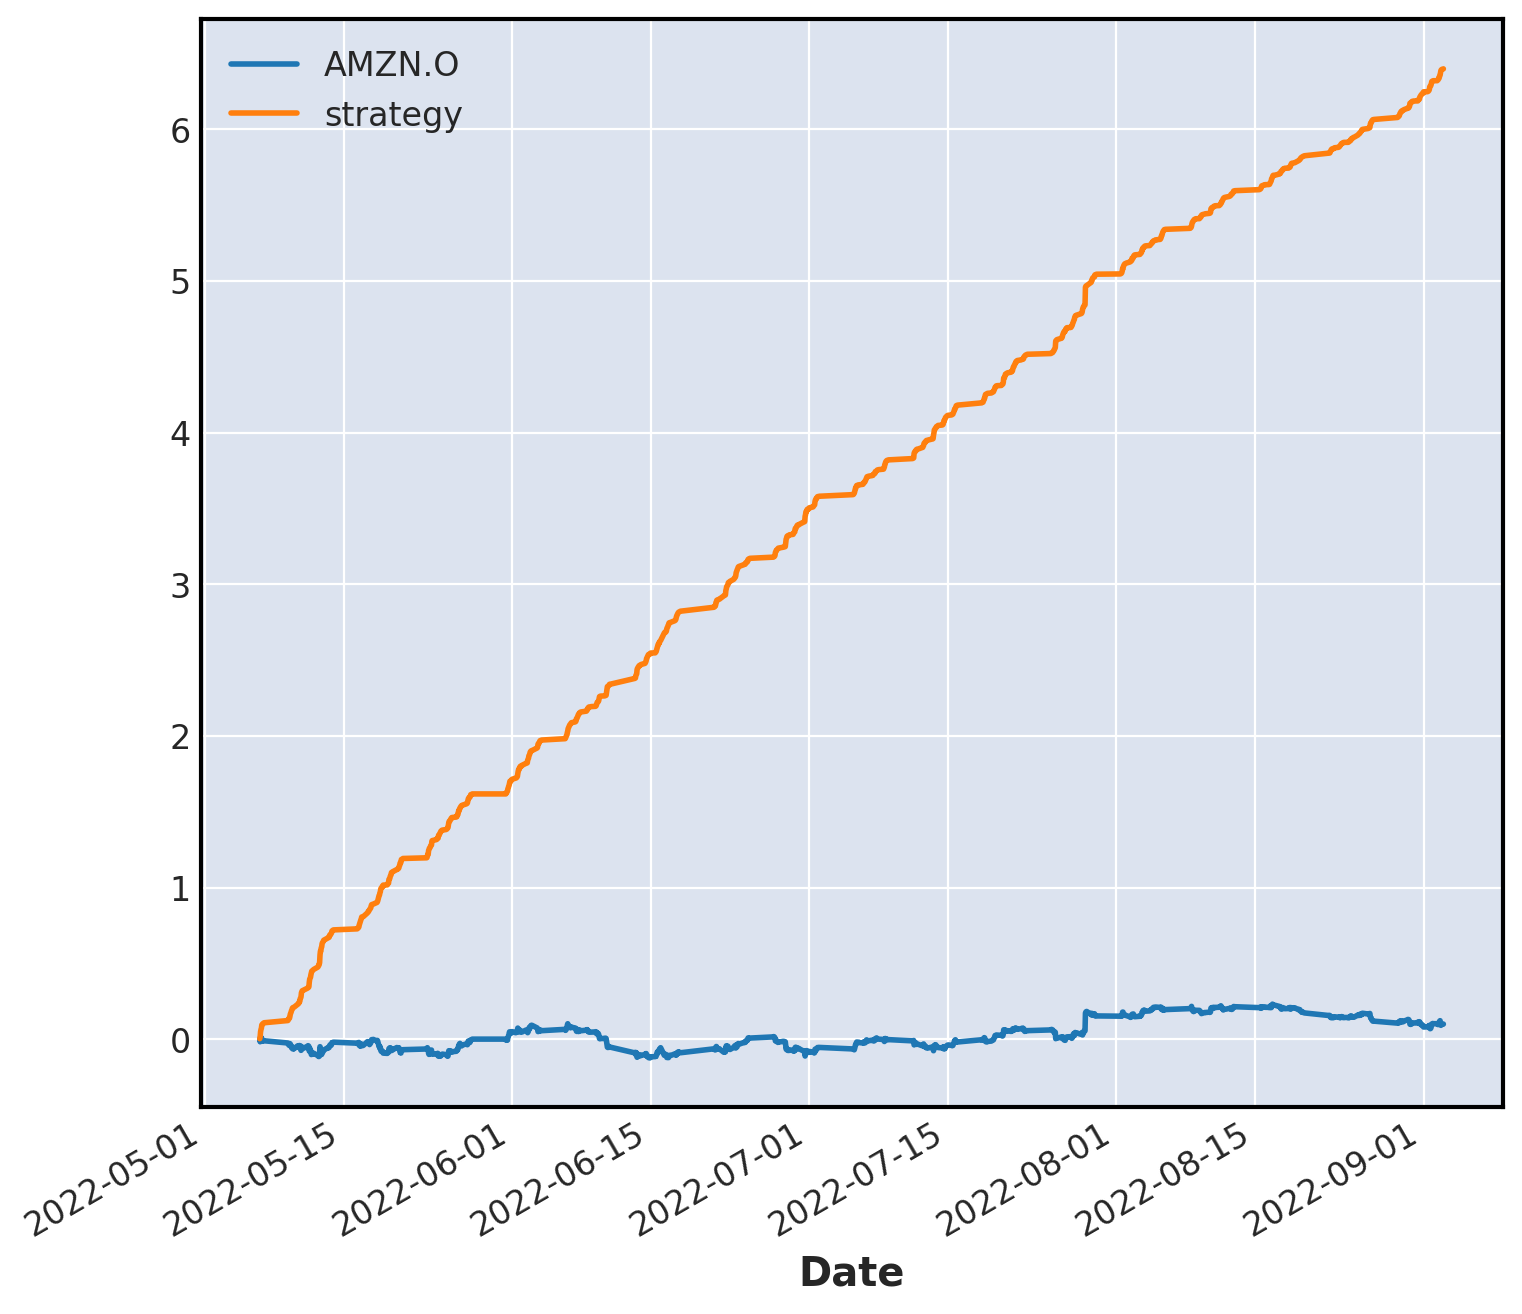

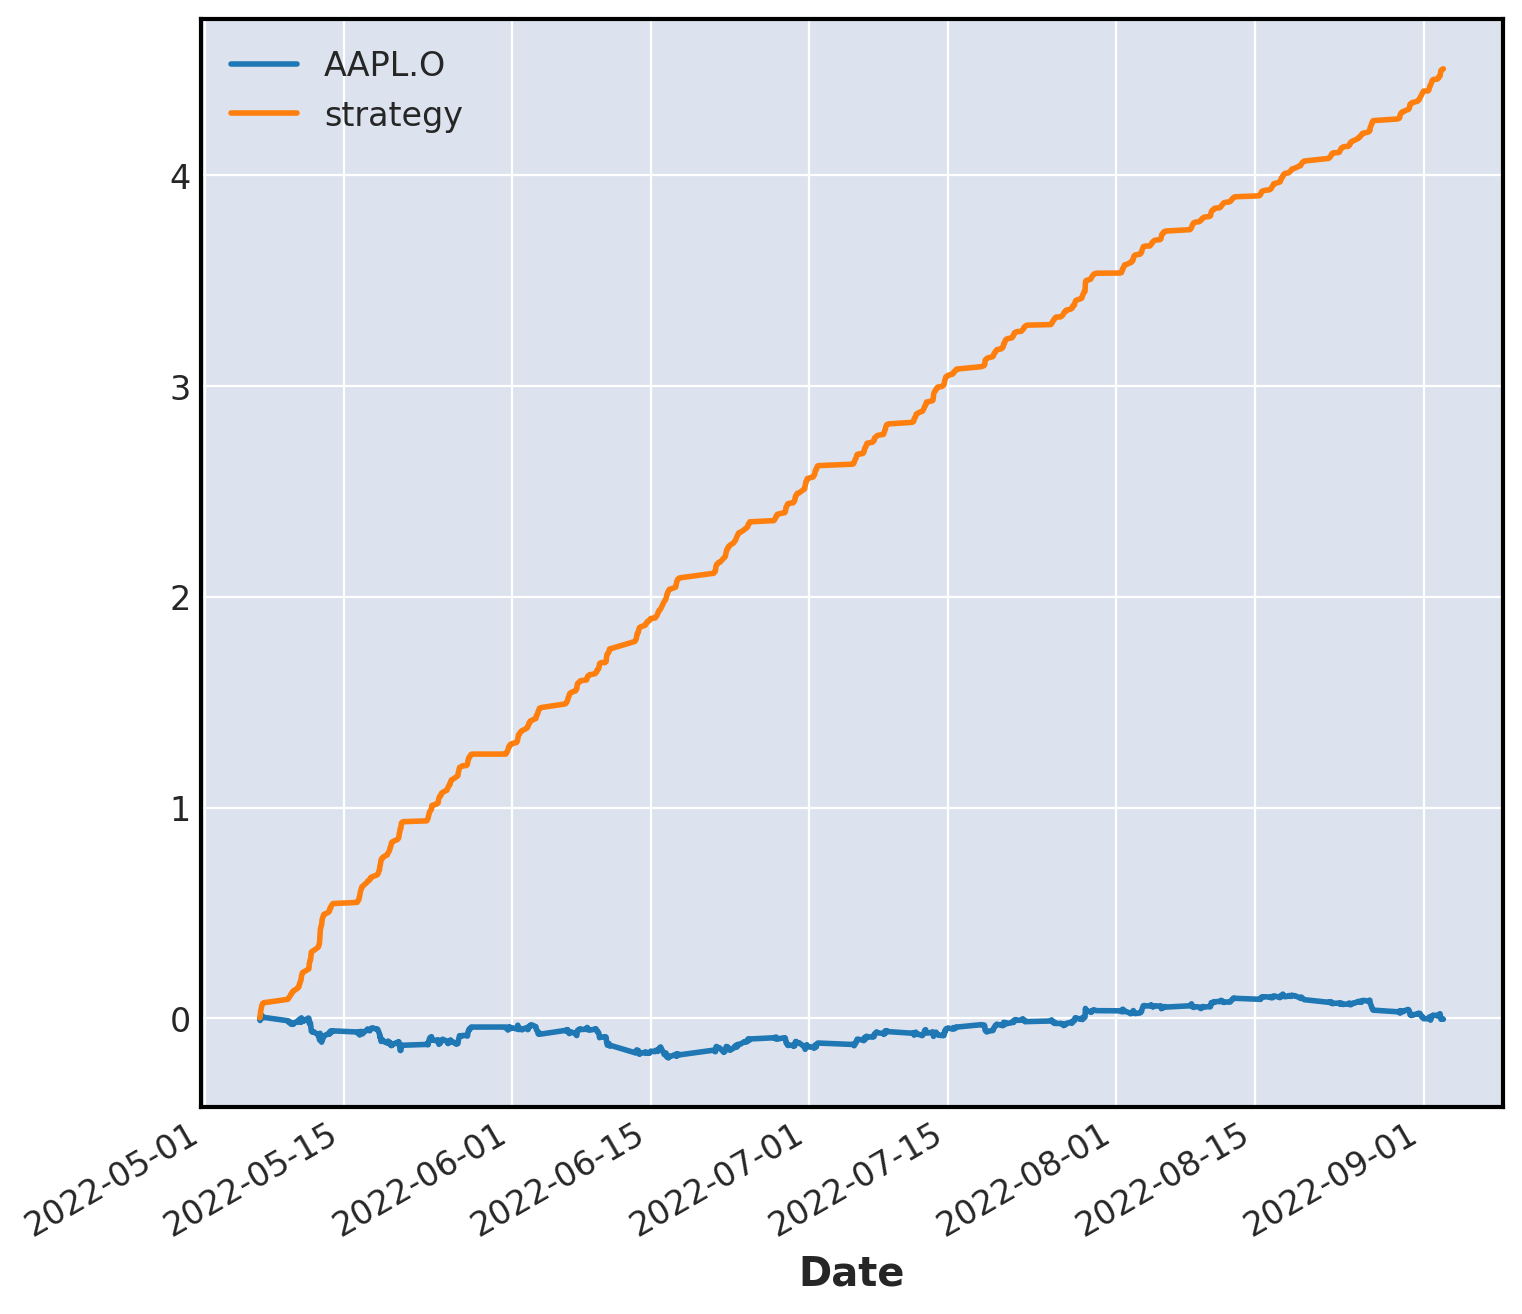

In [32]:
for ric in rics:
    dfs[ric][[ric, 'strategy']].astype(float).cumsum().plot(figsize=(10,8))  #.apply(np.exp)

### More sensible approach splits data into train and test sets - here we use 50% - 50% split

In [33]:
res = {}
for ric in rics:
    model = SVC(C=100) # the ML model
    df = dfs[ric].copy()  # getting data for the RIC
    split = int(len(df) / 2)
    train_x = np.sign(df[cols]).iloc[:split]
    train_y = np.sign(df[ric]).iloc[:split]
    test_x = np.sign(df[cols]).iloc[split:]
    test_y = df[ric].iloc[split:]
    model.fit(train_x, train_y.astype(float))  # model fitting
    pred = model.predict(test_x)  # prediction
    strat = pred * test_y
    res[ric] = pd.DataFrame({ric: test_y,
                             'pred': pred,
                             'strategy': strat})

In [34]:
res['AAPL.O'].head()

,AAPL.O,pred,strategy
Date,,,
2022-07-07 19:00:00,-0.001058,-1.0,0.001058
2022-07-07 20:00:00,0.001058,-1.0,-0.001058
2022-07-07 21:00:00,-0.001984,-1.0,0.001984
2022-07-07 22:00:00,0.000137,1.0,0.000137
2022-07-07 23:00:00,-0.000616,1.0,-0.000616


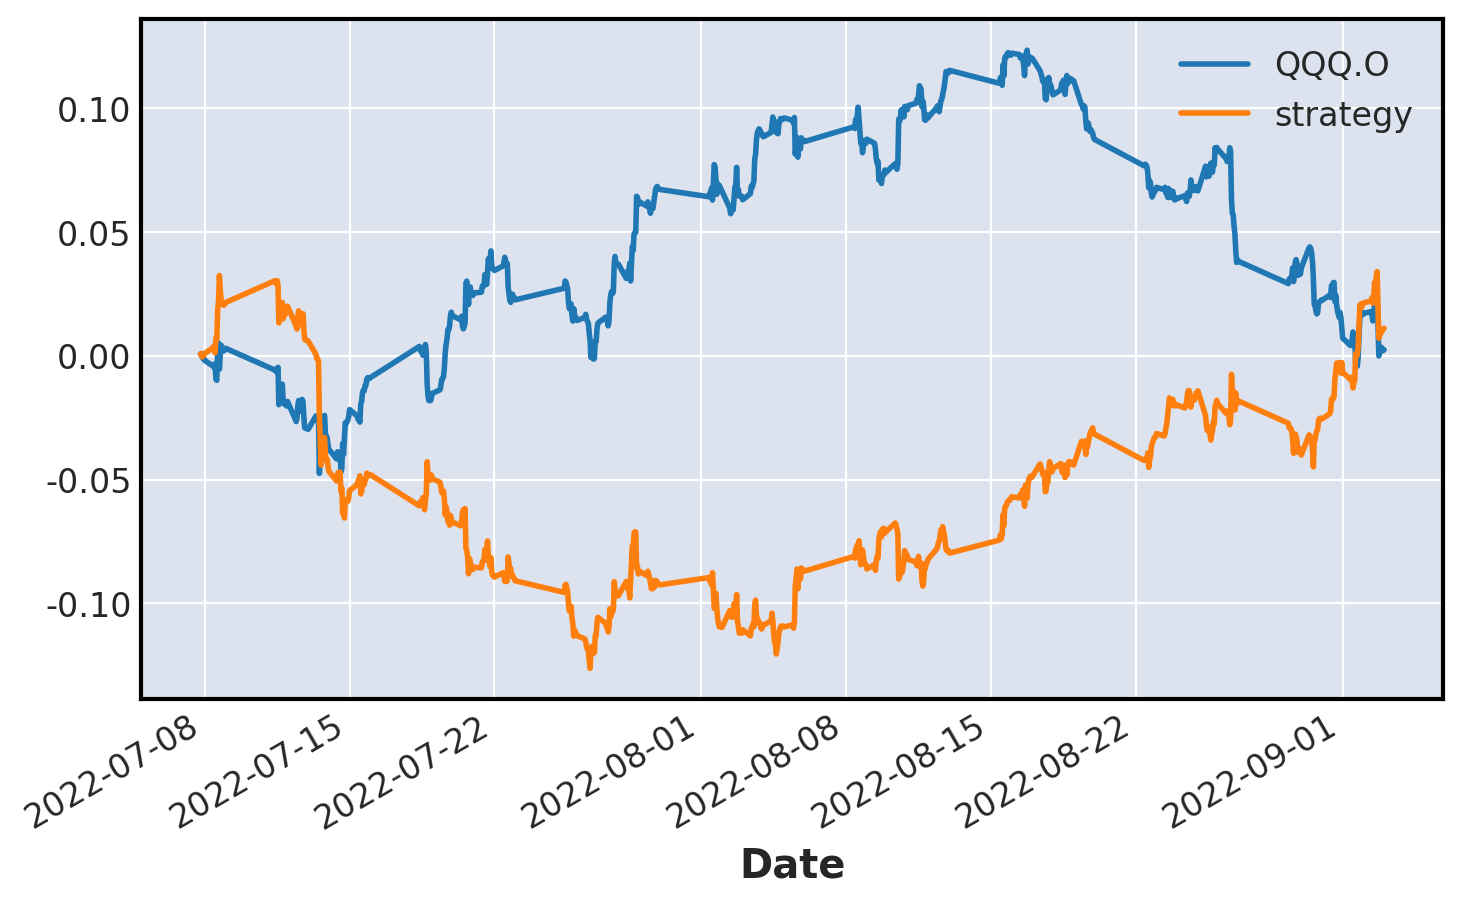

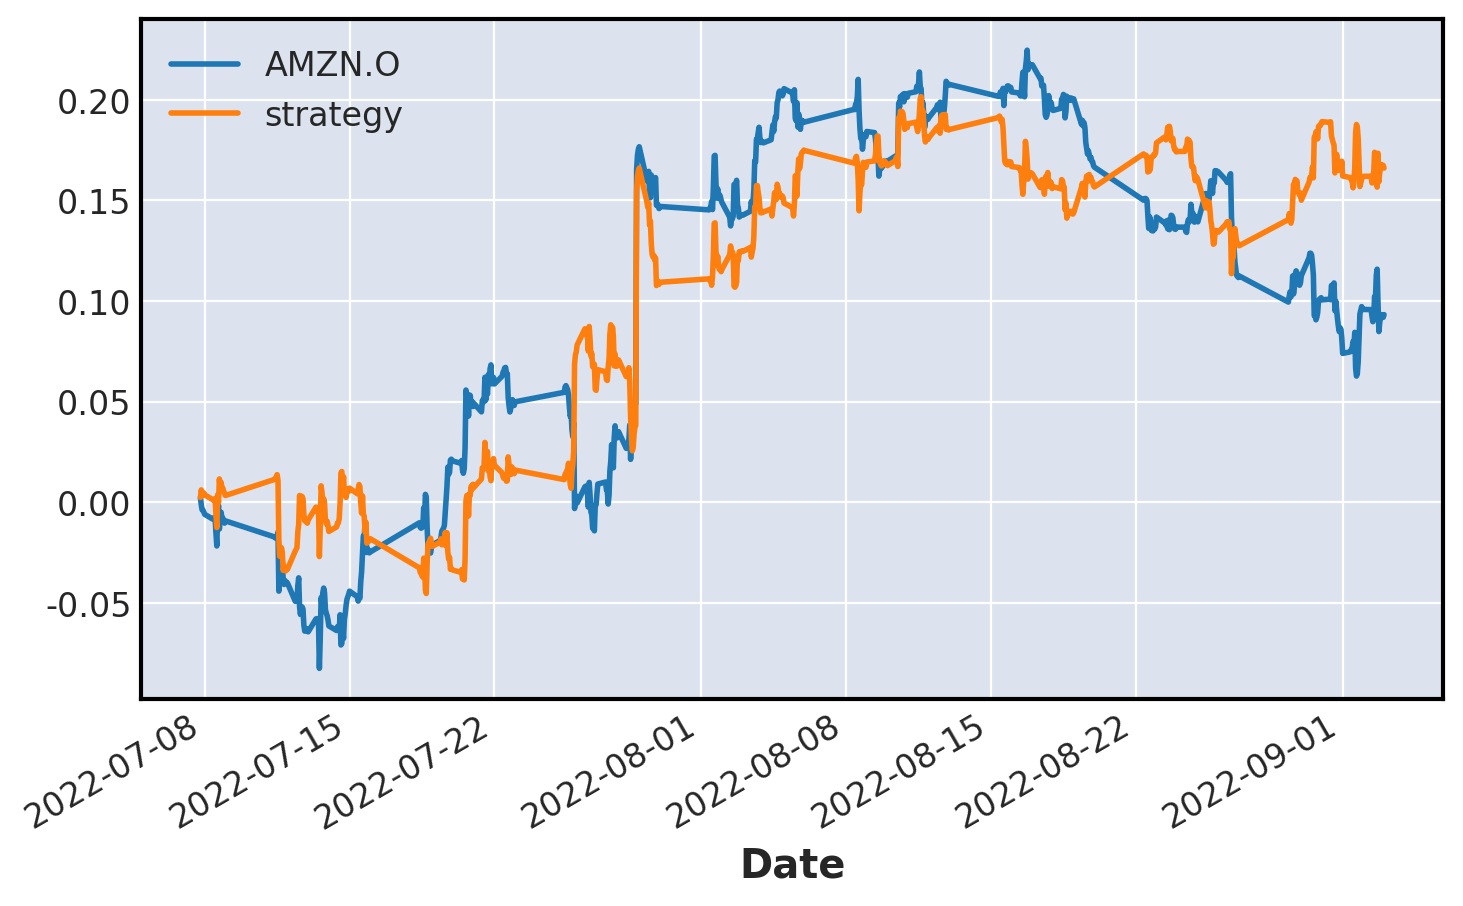

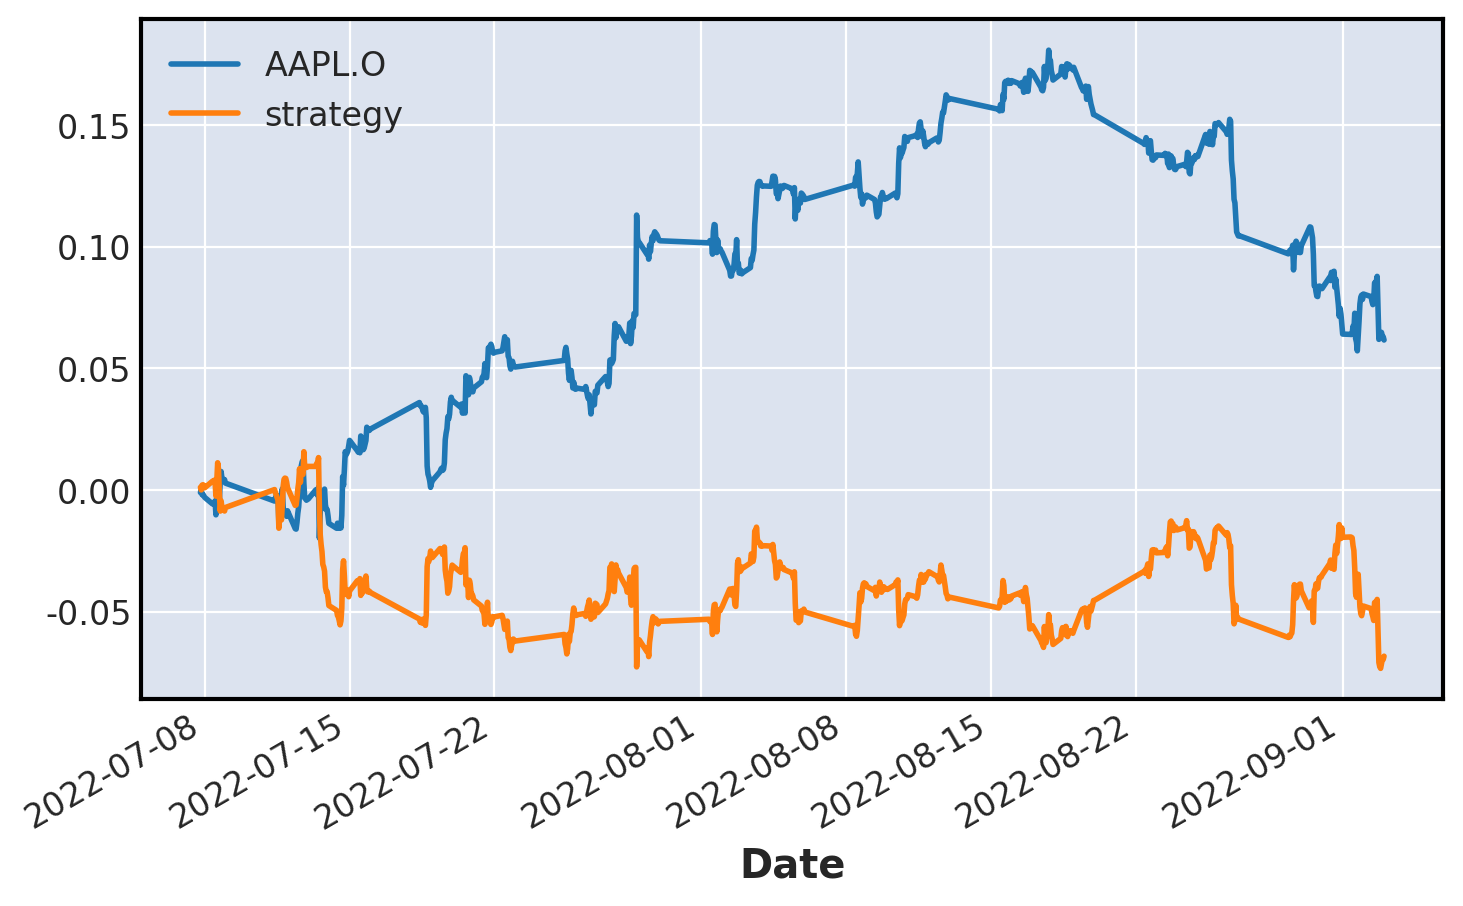

In [35]:
for ric in rics:
    res[ric][[ric, 'strategy']].cumsum().astype(float).plot(figsize=(10,5))

### Conclusion 

### We can easily generate TA features using Python Packages

### These work seamlessly with output from our Eikon Data API

### Simple to plot candlestick patterns firing on a chart

### We can create trading strategies using our TA features simply using Backtrader

### We can generate simple AI strategy using pattern recognition of lagged returns

## Further Resources

### Refinitiv Developer Community

* [Articles](https://developers.refinitiv.com/en/article-catalog) 
* [Use Cases](https://developers.refinitiv.com/en/use-cases-catalog)
* [Videos](https://developers.refinitiv.com/en/video-catalog)
* [APIs](https://developers.refinitiv.com/en/api-catalog?q1=devportal%3Acapability/recommended&x1=api_capabilities)
* [Q&A Forums](https://community.developers.refinitiv.com/index.html?)
* [Python Quants Tutorial Series - 13 Videos wth Notebooks](https://developers.refinitiv.com/en/api-catalog/eikon/eikon-data-api/tutorials#python-quants-video-tutorial-series)

For Content Navigation in Eikon / Workspace - please use the Data Item Browser Application: Type 'DIB' into Search Bar.

### For Python/ AI/ML / Quant Finance / Algo Trading training

* [The Python Quants](https://home.tpq.io/)

    * Books:
    * [Python for Algorithmic Trading](https://www.oreilly.com/library/view/python-for-algorithmic/9781492053347/)
    * [Artifical Intelligence in Finance](https://www.oreilly.com/library/view/artificial-intelligence-in/9781492055426/)
    * [Python for Finance 2nd Ed.](https://www.oreilly.com/library/view/python-for-finance/9781492024323/)

### For Technical Analysis training & consultancy - Trevor Neil

* [The Beta Group](http://betagroup.co.uk/)

### Meetup Groups

* [Python Quants Meetup Group (Virtual/Live)](https://www.meetup.com/python-for-quant-finance-london/)
